In [1]:
import numpy as np

In [2]:
import scipy as sp

In [3]:
from scipy import signal as sig

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import soundfile as sf

In [6]:
x, Fs = sf.read('C:\WAV.wav')

In [7]:
x

array([[  9.15527344e-04,   1.49536133e-03],
       [  8.54492188e-04,   1.58691406e-03],
       [  9.15527344e-04,   1.55639648e-03],
       ..., 
       [ -6.10351562e-05,  -3.05175781e-05],
       [ -3.05175781e-05,   3.05175781e-05],
       [ -3.05175781e-05,   3.05175781e-05]])

In [8]:
x.shape

(242550, 2)

In [9]:
zvuk = x[:,0]

In [10]:
zvuk.shape

(242550,)

In [11]:
t = np.arange(len(zvuk))/Fs

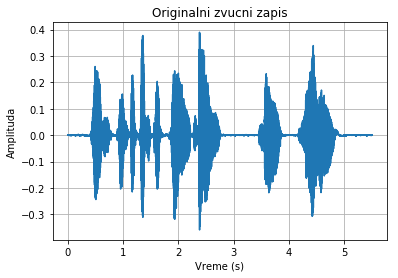

In [12]:
plt.plot(t, zvuk) 
plt.grid() 
plt.xlabel("Vreme (s)") 
plt.ylabel("Amplituda") 
plt.title("Originalni zvucni zapis") 
plt.show()

In [13]:
zvuk_X = sp.fft(zvuk)

In [14]:
zvuk_X

array([-17.49066162+0.j        ,  -1.85225612+2.48612687j,
        -4.76977827+7.55465075j, ...,  -6.14645201-7.61864798j,
        -4.76977827-7.55465075j,  -1.85225612-2.48612687j])

In [15]:
F = sp.linspace(0, Fs, len(zvuk_X) + 1)

In [16]:
F = F[:-1]

In [17]:
N = len(zvuk_X)

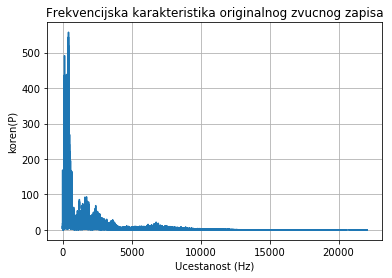

In [18]:
plt.plot(F[0:round(N/2)], sp.absolute(zvuk_X[0:round(N/2)]))
plt.title("Frekvencijska karakteristika originalnog zvucnog zapisa")
plt.xlabel("Ucestanost (Hz)")
plt.ylabel("koren(P)")
plt.grid()
plt.show()

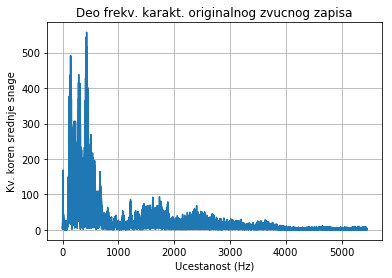

In [19]:
plt.plot(F[0:30000], sp.absolute(zvuk_X[0:30000]))
plt.title("Deo frekv. karakt. originalnog zvucnog zapisa")
plt.xlabel("Ucestanost (Hz)")
plt.ylabel("Kv. koren srednje snage")
plt.grid()
plt.show()

In [20]:
sf.write("C:/Users/Mateja/Desktop/zvuk_original.wav", zvuk, Fs)

In [21]:
k = 0.03
summ = k*np.random.randn(len(zvuk))
zvuk_sum = zvuk + summ

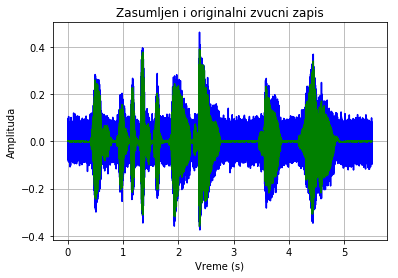

In [22]:
plt.plot(t, zvuk_sum, 'b')
plt.plot(t, zvuk, 'g')
plt.grid()
plt.xlabel("Vreme (s)")
plt.ylabel("Amplituda")
plt.title("Zasumljen i originalni zvucni zapis")
plt.show()

In [23]:
sf.write("C:/Users/Mateja/Desktop/zvuk_zasumljen.wav", zvuk_sum, Fs)

In [24]:
fg15 = [1500 / (Fs/2)]

In [25]:
b, a = sig.butter(5, fg15, "lowpass") 
zvuk_fil_15 = sig.lfilter(b, a, zvuk_sum)

In [26]:
zvuk_fil_15 = 4*zvuk_fil_15

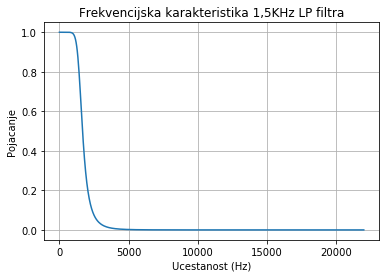

In [27]:
w, h = sig.freqz(b, a)
plt.plot((0.5*Fs / np.pi)*w, np.absolute(h))
plt.grid()
plt.title("Frekvencijska karakteristika 1,5KHz LP filtra")
plt.xlabel("Ucestanost (Hz)")
plt.ylabel("Pojacanje")
plt.show() 

In [28]:
sf.write("C:/Users/Mateja/Desktop/zvuk_filtriran15.wav", zvuk_fil_15,Fs)

In [29]:
fg35 = [3500/(Fs/2)]

In [30]:
b, a = sig.butter(5, fg35, "lowpass") 
zvuk_fil_35 = sig.lfilter(b, a, zvuk_sum)

In [31]:
zvuk_fil_35 = 2.5*zvuk_fil_35

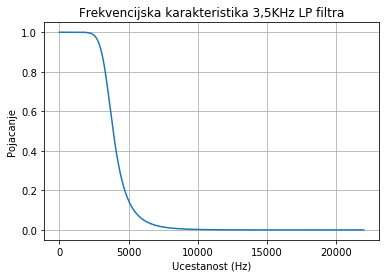

In [32]:
w, h = sig.freqz(b, a)

plt.plot((0.5*Fs / np.pi)*w, np.absolute(h))
plt.grid()
plt.title("Frekvencijska karakteristika 3,5KHz LP filtra")
plt.xlabel("Ucestanost (Hz)")
plt.ylabel("Pojacanje")
plt.show() 

In [33]:
sf.write("C:/Users/Mateja/Desktop/zvuk_filtriran35.wav", zvuk_fil_35, Fs)

In [34]:
fg50 = [5000/(Fs/2)]

In [35]:
b,a=sig.butter(5, fg50, "lowpass") 
zvuk_fil_50 = sig.lfilter(b,a,zvuk_sum)

In [36]:
zvuk_fil_50 = 1.5*zvuk_fil_50

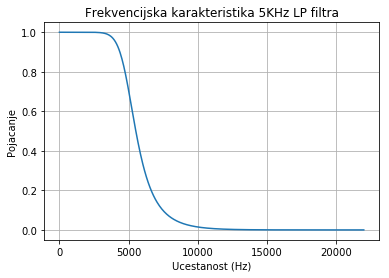

In [37]:
w, h = sig.freqz(b, a)

plt.plot((Fs * 0.5 / np.pi)*w, np.absolute(h))
plt.grid()
plt.title("Frekvencijska karakteristika 5KHz LP filtra")
plt.xlabel("Ucestanost (Hz)")
plt.ylabel("Pojacanje")
plt.show()

In [38]:
sf.write("C:/Users/Mateja/Desktop/zvuk_filtriran50.wav", zvuk_fil_50, Fs)